# Problem statement
Flight ticket prices can be something hard to guess, today we might see a price, check
out the price of the same flight tomorrow, it will be a different story. We might have often
heard travelers saying that flight ticket prices are so unpredictable. That’s why we will
try to use machine learning to solve this problem. This can help airlines by predicting
what prices they can maintain.

We will be using Supervised Regression techniques to obtain the objective of creating a predictive model which will help the customers to predict future flight prices and plan their journey accordingly.

Why Regression?
Because the flight fare or ticket price is our target variable and the respective values are continous.

From the domain knowledge we understand that flight fare depends on Airline,source,destination,total stops,duration,route,dep_time,arrival_time

We'll run through the steps of building a regression model but first let's explore the data and understand it better.

In [23]:
# Step 1- Import basic libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [25]:
# step 2- Load the data
data = pd.read_excel('Flight_Fare.xlsx')

In [26]:
pd.set_option('display.max_columns',None)
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


### Domain Analysis
* Here Price is our target variable and all the other columns are our input variables which affect the Flight price.
* This data is from aviation sector which helps in predicting the future flight fares
* This data is taken from the year 2019

In [27]:
# step 3- Basic checks
data.shape

(10683, 11)

* There are 10683 rows and 11 columns

In [28]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


* There are no null values in any column
* The memory usage of this data is 918.2 KB

In [30]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [32]:
data.describe(include=['O']).T

,count,unique,top,freq
Airline,10683,12,Jet Airways,3849
Date_of_Journey,10683,44,18/05/2019,504
Source,10683,5,Delhi,4537
Destination,10683,6,Cochin,4537
Route,10682,128,DEL → BOM → COK,2376
Dep_Time,10683,222,18:55,233
Arrival_Time,10683,1343,19:00,423
Duration,10683,368,2h 50m,550
Total_Stops,10682,5,1 stop,5625
Additional_Info,10683,10,No info,8345


### Insights
* Average flight fare is Rs 9087
* Min flight fare is Rs 1759 and Max flight fare is Rs 79512
* There are 12 Airlines and Jet Airways is maximum travelled with freq of 3849
* There are 5 Source where Flight takes off with 5 states Delhi being the most by 4537
* There are 6 Destination where Flight lands with 6 states Cochin being the most by 4537
* Max customers took flight was on 18/05/2019
* Max route the flights have taken is DEL-BOM-COK
* Total stops which was only one stop found to be highest with 5625 cases
* Additional info contains 80% No info so this column can be ignored.

In [33]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


* Displays first 5 rows

In [34]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


* Displays last five rows

# Exploratory data analysis

<Axes: ylabel='Density'>

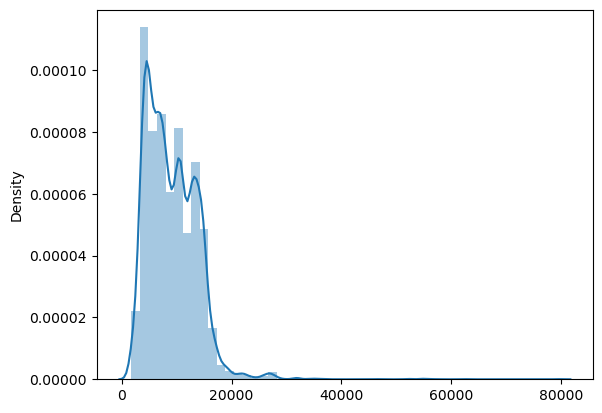

In [35]:
# Univariate analysis
sns.distplot(x=data.Price)

### Since the model would not be able to understand the data present in Duration column we have to preprocess the data first

In [36]:
data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [37]:
# checking for null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [38]:
# Dropping the NaN values
data.dropna(inplace=True)

In [39]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### From description we know that Date_of_journey column is object datatype
- Therefore we have to convert this datatype into timestap inorder to use this column properly for prediction
- For this we will use pandas to_datetime to convert object datatype to datetime datatype
- .dt.day will extract only days of that data
- .dt.month will extract only months of that data

In [40]:
data["Journey_day"] = pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.day

In [41]:
data['Journey_month'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y').dt.month

In [42]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [43]:
# Since the Date_of_Journey column contains the data of only 2019 and it is already converted into day and month.
# we can drop the column as it is no use
data.drop('Date_of_Journey',axis=1,inplace = True)

In [44]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [45]:
# Departure time is when the flight leaves the gate
# Similar to date_of_journey we can extract values from dep_time

data['Dep_hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_min'] = pd.to_datetime(data['Dep_Time']).dt.minute

In [46]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [47]:
# Since Dep_time column has no use we will drop the column
data.drop('Dep_Time',axis=1,inplace = True)

In [48]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [49]:
# Same procedure should be done with the column Arrival_time and extract values from it and drop the column
data['Arrival_hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arrival_min'] = pd.to_datetime(data['Arrival_Time']).dt.minute
# drop the Arrival_time column as it is of no use
data.drop('Arrival_Time',axis=1,inplace = True)

In [50]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [51]:
# Time taken by the plane to reach the destination is called duration
# It is the difference between departure time and arrival time

# Assigning and converting duration column into list
duration = list(data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # check if the duration contains only hours or min
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'  #Adds 0min
        else:
            duration[i] = '0h ' + duration[i]  # Adds 0hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))  # Extracts hours from duration
    duration_mins.append(int(duration[i].split(sep='m')[0].split()[-1]))  # Extracts only min from duration

In [52]:
# Adding duration_hours and duration_mins to data
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins

In [53]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [54]:
# Since now duration column is of no use we can drop the column
data.drop('Duration',axis=1,inplace = True)

In [55]:
data.head(10)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45
5,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,3873,24,6,9,0,11,25,2,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,22270,1,3,8,0,5,5,21,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,8625,27,5,11,25,19,15,7,50


### Handling categorical data
- Nominal data - data is not in any order - OneHotEncoder is used
- Ordinal data - data is in order - LabelEncoder is used

In [56]:
data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

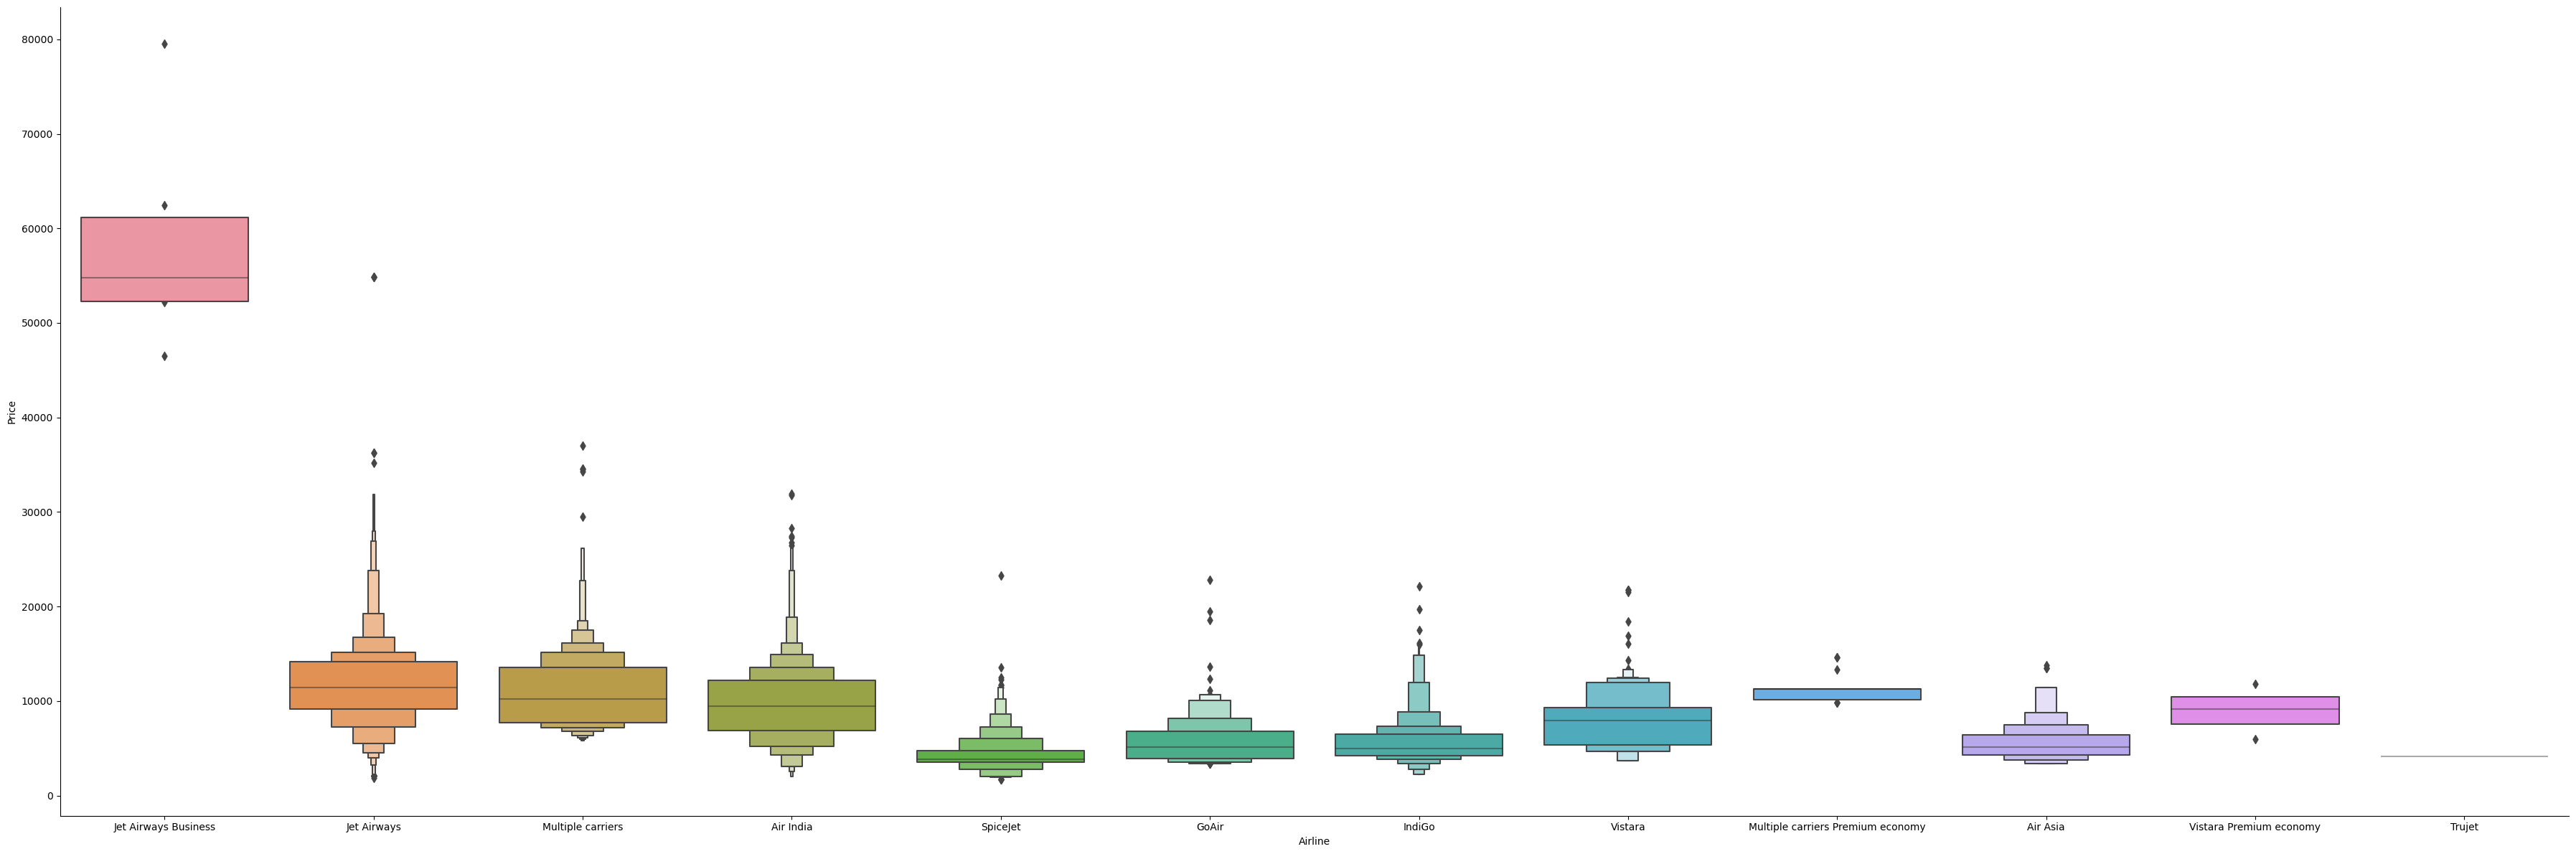

In [57]:
# Airline vs Price
sns.catplot(y='Price', x='Airline',data=data.sort_values('Price',ascending = False), kind = 'boxen', height = 12, aspect =3)
plt.show()

In [58]:
# As Airlines column is nominal data hence OneHotEncoder is used
Airline = data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [59]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

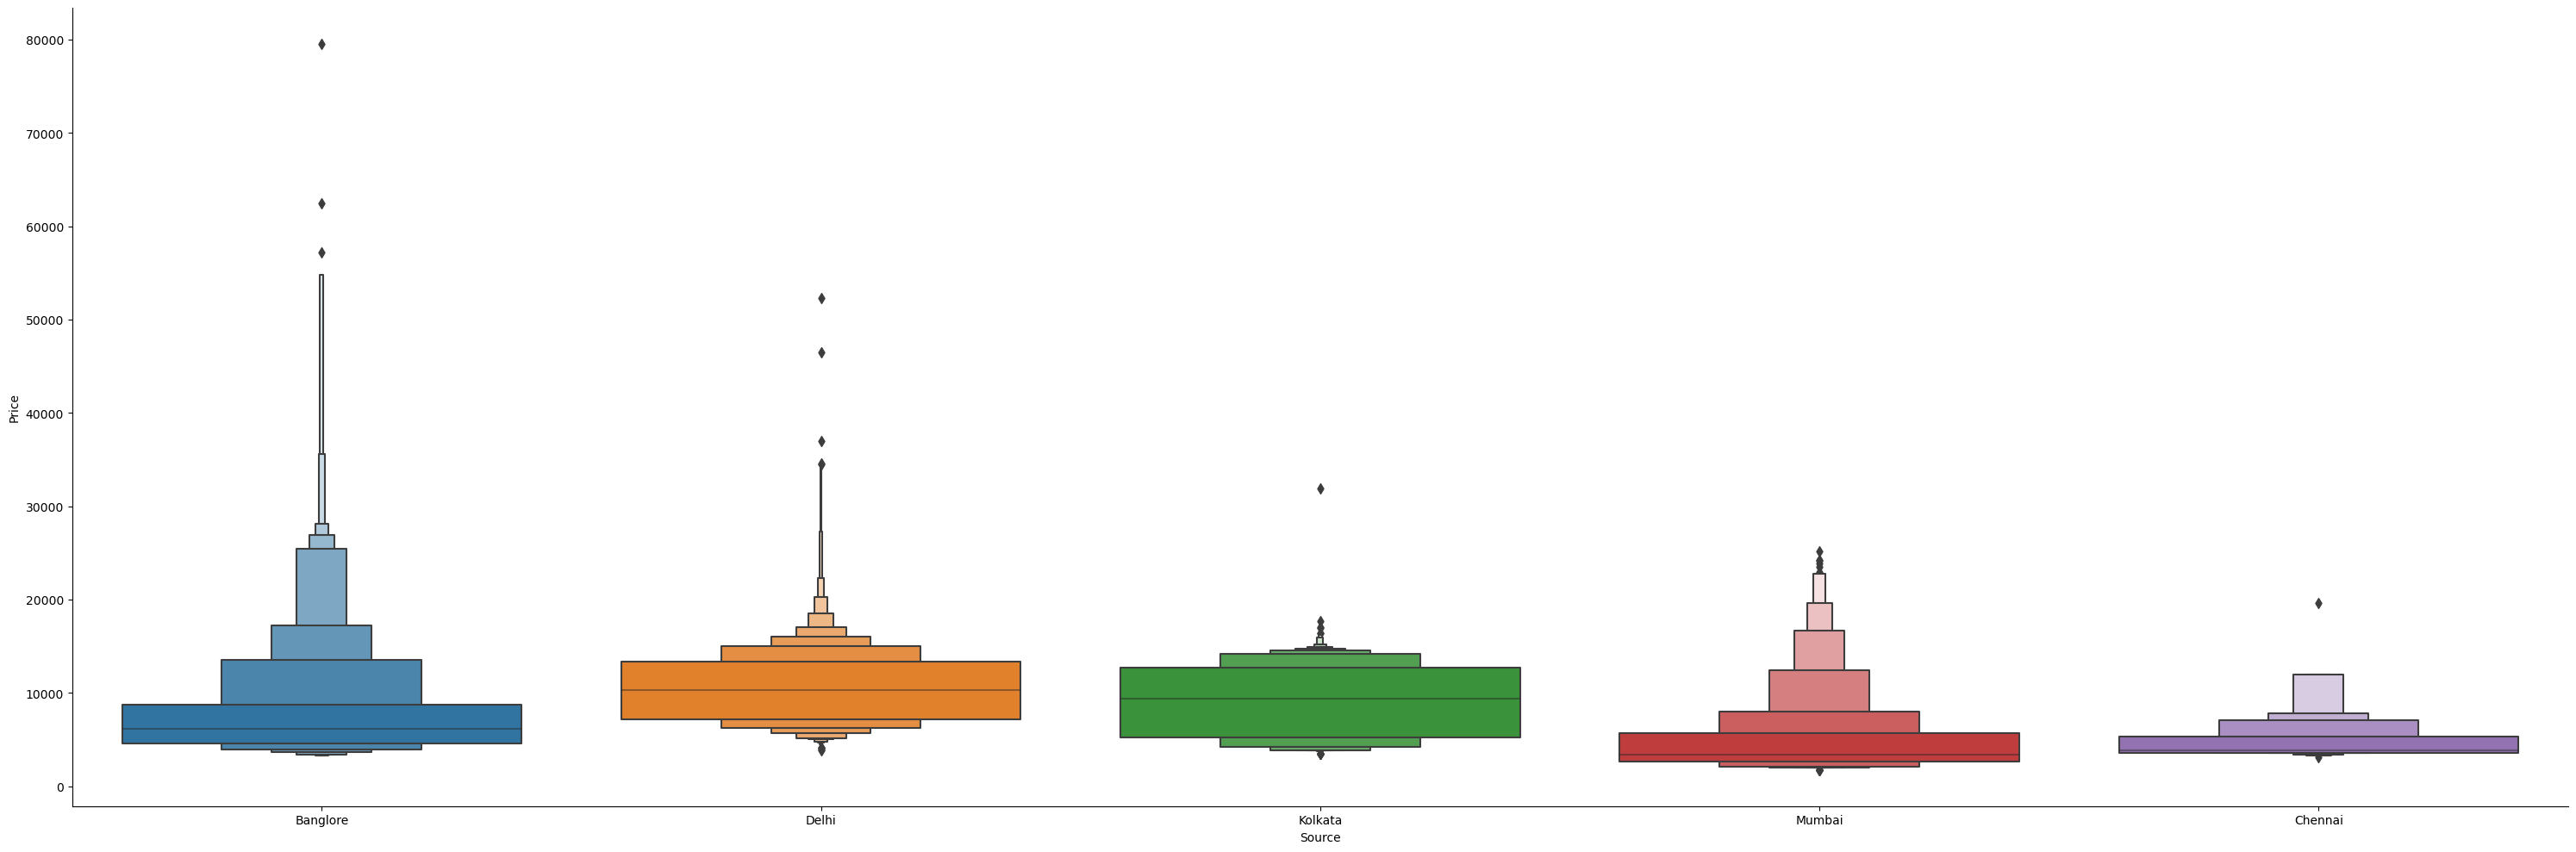

In [60]:
sns.catplot(x='Source',y = 'Price', data = data.sort_values('Price',ascending = False), kind = 'boxen', height = 10, aspect = 3)
plt.show()

In [61]:
# As source column is nominal data we use onehotencoder
Source = data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [62]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [63]:
# Even destination column is nominal data hence we have to use onehotencoder
Destination = data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [64]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [65]:
data['Total_Stops']

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [66]:
# Since total stops also represents route we can drop route
# additional info column contains 80% of no_info hence we can also drop this
data.drop(['Route','Additional_Info'],axis = 1, inplace = True)

In [67]:
data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [68]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [69]:
# As this data is ordinal data we can use labelencoder
# Here values are assigned with corresponding keys
data.replace({'non-stop':0,'1 stop':1, '2 stops':2, '3 stops':3,'4 stops':4},inplace = True)

In [70]:
data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40


In [71]:
# Now concate all the columns data, Airline, Source, Destination
new_data = pd.concat([data, Airline, Source, Destination],axis =1)
new_data

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,Jet Airways,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,Vistara,Banglore,New Delhi,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [72]:
# Since categorical columns are handles with encoders we can drop the categorical columns
new_data.drop(['Airline','Source','Destination'],axis =1, inplace = True)

In [73]:
new_data

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Feature engineering
* To check the colinearity between the features and the target variable
* To chech multicolinearity between the independent features

In [74]:
new_data.corr()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.009451,0.054383,-0.061476,-0.002618,0.038140,-0.106940,0.739916,-0.136706,0.271094,-0.060110,-0.302991,0.215063,0.017876,0.118399,0.009089,-0.274351,0.002519,-0.120447,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,-0.153774,-0.103643,0.006799,-0.024458,0.024244,-0.086155,0.508778,-0.124855,0.050432,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.010381,-0.060654,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.009451,-0.153774,1.000000,-0.038359,0.002170,-0.008170,-0.003245,-0.017510,-0.022059,-0.008940,-0.032490,-0.003122,0.007281,-0.017304,-0.031713,0.042163,0.030839,0.022154,-0.008569,-0.013169,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Journey_month,0.054383,-0.103643,-0.038359,1.000000,0.039127,-0.059267,-0.003927,-0.100626,0.016141,-0.040897,-0.045981,-0.004494,-0.048504,0.059735,-0.034787,0.053685,-0.051222,-0.011977,-0.014199,-0.017252,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Dep_hour,-0.061476,0.006799,0.002170,0.039127,1.000000,-0.024745,0.005180,0.067911,0.002869,-0.023707,-0.012879,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.000857,0.023906,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dep_min,-0.002618,-0.024458,-0.008170,-0.059267,-0.024745,1.000000,0.043122,-0.017597,-0.022104,0.092485,-0.045688,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.010007,-0.077903,-0.011380,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.038140,0.024244,-0.003245,-0.003927,0.005180,0.043122,1.000000,-0.154363,0.055276,-0.118309,0.088872,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.003739,0.068834,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,-0.106940,-0.086155,-0.017510,-0.100626,0.067911,-0.017597,-0.154363,1.000000,-0.074450,0.151628,0.061231,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,-0.002750,0.069422,0.000314,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271
Duration_hours,0.739916,0.508778,-0.022059,0.016141,0.002869,-0.022104,0.055276,-0.074450,1.000000,-0.126468,0.261707,-0.094044,-0.346230,0.307196,-0.011847,-0.008070,-0.002271,-0.263844,-0.008253,-0.020358,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.008940,-0.040897,-0.023707,0.092485,-0.118309,0.151628,-0.126468,1.000000,-0.033427,0.067215,0.119817,-0.084052,-0.002322,-0.118766,-0.006853,0.041319,-0.007610,0.041952,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


<Axes: >

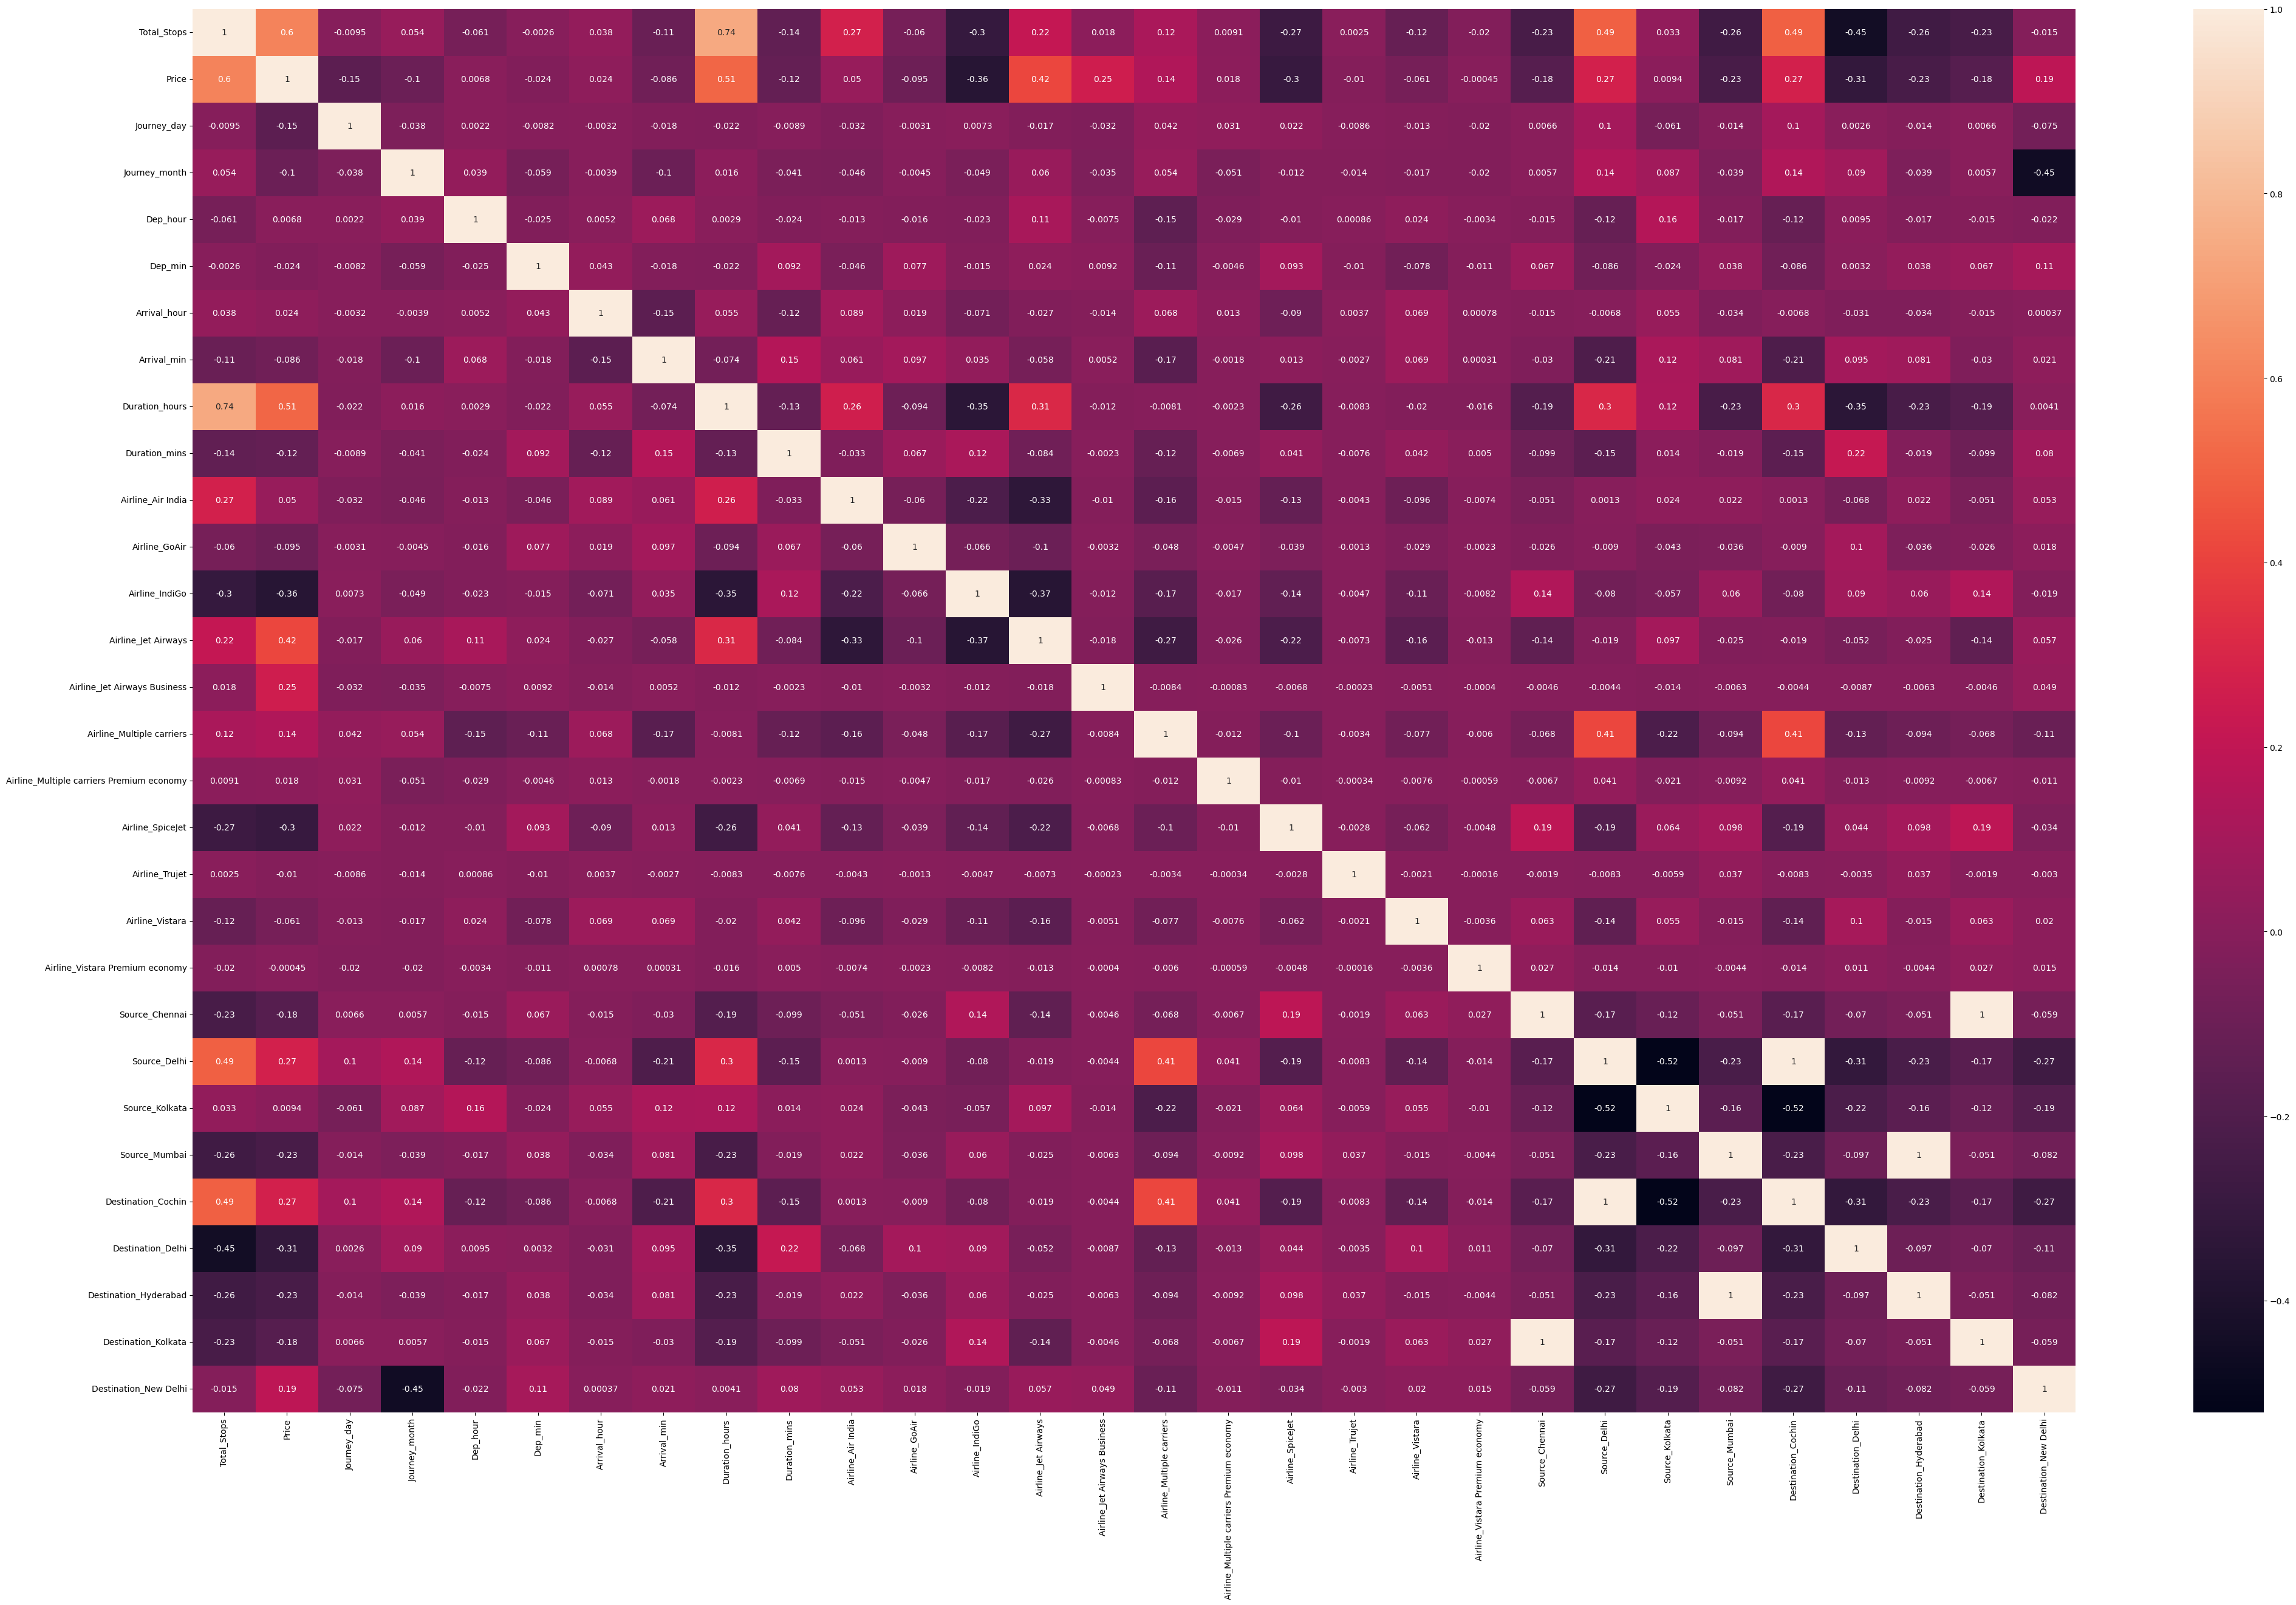

In [75]:
# Checking collinearity of input variables with target variable
plt.figure(figsize = (50,30))
sns.heatmap(new_data.corr(),annot = True)

<Axes: >

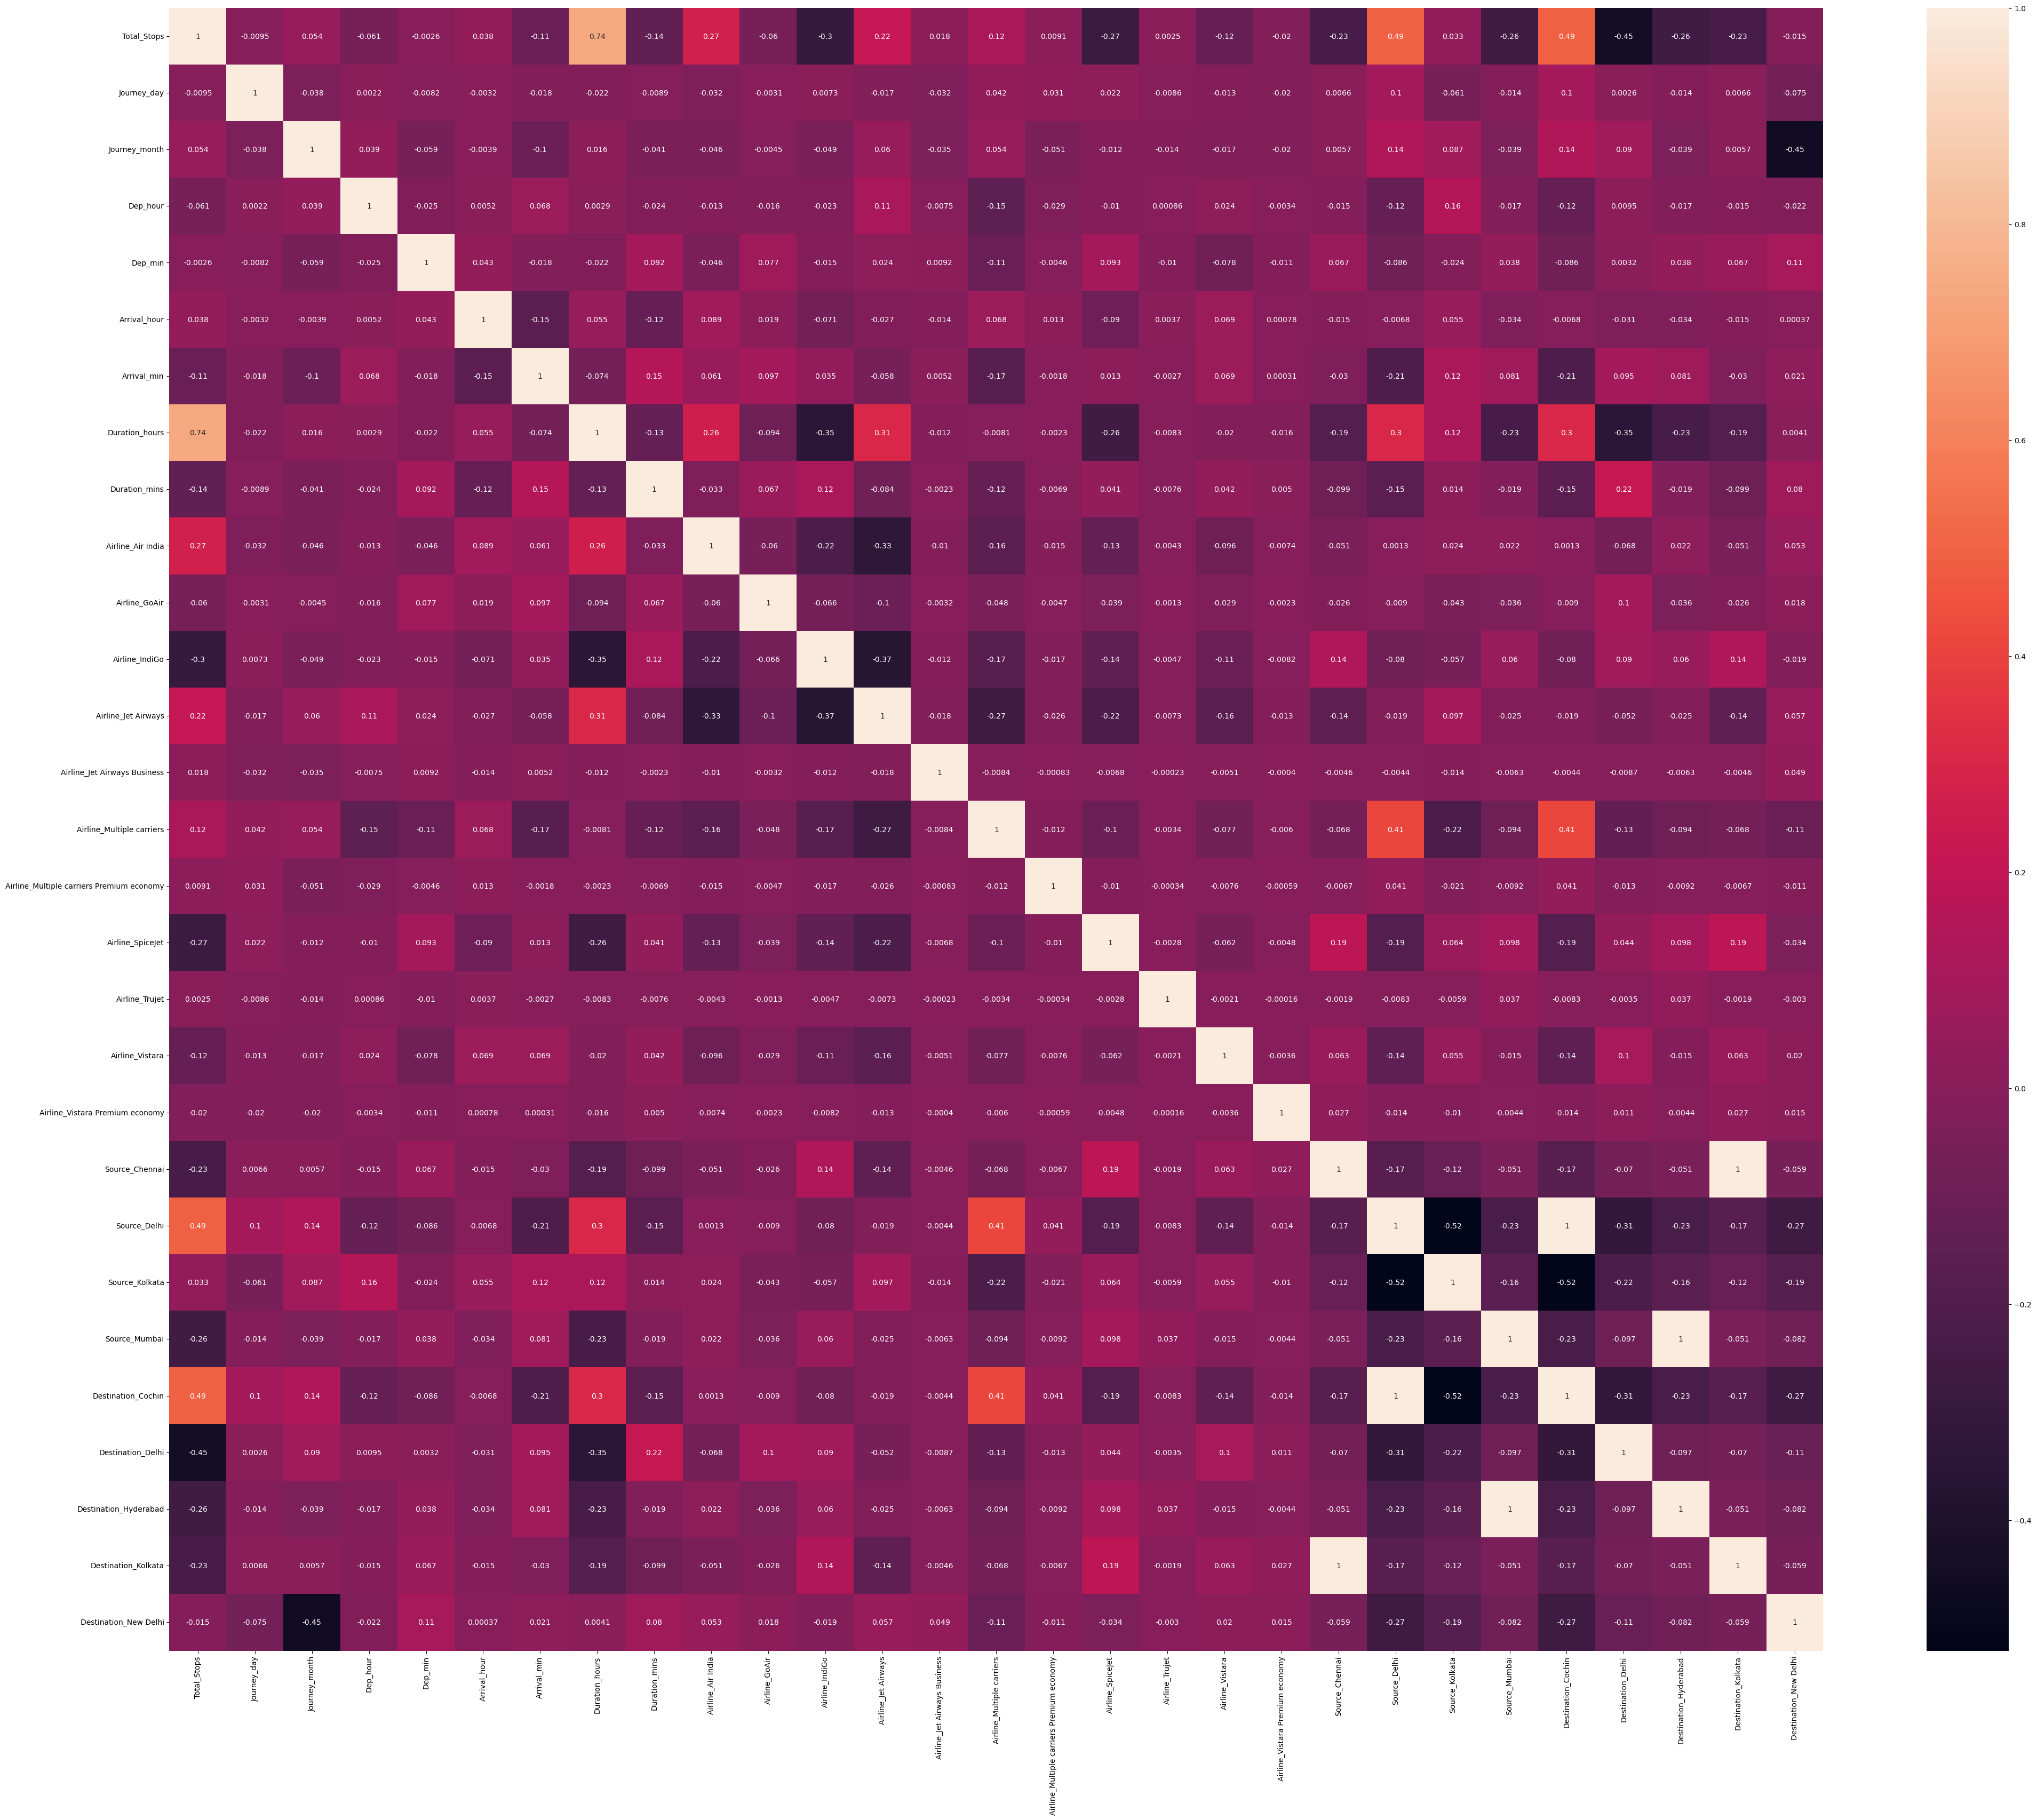

In [76]:
# To check multicollinearity within input variables
plt.figure(figsize=(50,40))
sns.heatmap(new_data.drop('Price',axis=1).corr(),annot=True)

<Axes: xlabel='Price'>

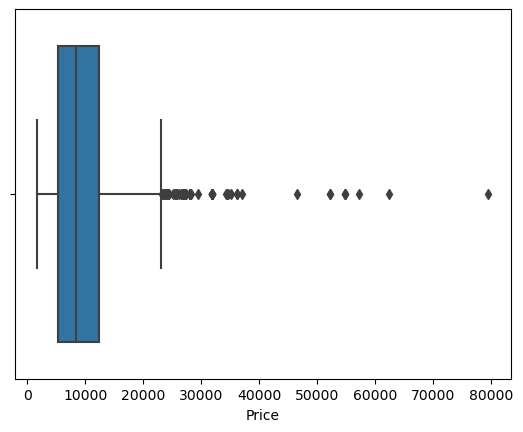

In [77]:
# check for outliers
sns.boxplot(x=data.Price)

In [78]:
# Since the data is not normal we will use IQR method
Q1=data['Price'].quantile(0.25)
Q3=data['Price'].quantile(0.75)

In [79]:
Q1

5277.0

In [80]:
Q3

12373.0

In [81]:
IQR = Q3-Q1
IQR

7096.0

In [82]:
# finding lowerlimit and upperlimit
lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print('The lower limit is',lower_limit)
print('The upper_limit is',upper_limit)

The lower limit is -5367.0
The upper_limit is 23017.0


In [83]:
# Find out the values which exceeds this limits
new_data.loc[new_data['Price']>upper_limit]

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
123,1,27430,1,3,23,0,19,15,20,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
396,1,36983,1,3,12,50,19,15,6,25,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
486,1,26890,1,3,8,55,15,15,6,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
510,1,26890,1,3,7,0,12,25,5,25,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
597,2,25139,6,3,9,40,15,15,29,35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,2,24210,6,3,19,50,16,50,21,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
10364,1,57209,1,3,9,45,14,25,4,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10383,1,26890,1,3,7,0,5,5,22,5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10439,1,31825,1,3,18,40,9,0,14,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [84]:
len(new_data.loc[new_data['Price']>upper_limit])/len(new_data)*100

0.8799850215315483

In [85]:
new_data.loc[new_data['Price']<lower_limit]

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi


In [86]:
# the outliers are less than 5% so the outliers can be replaced with median values since data is not normal

In [87]:
new_data.loc[new_data['Price']>upper_limit]=data['Price'].median()

<Axes: xlabel='Price'>

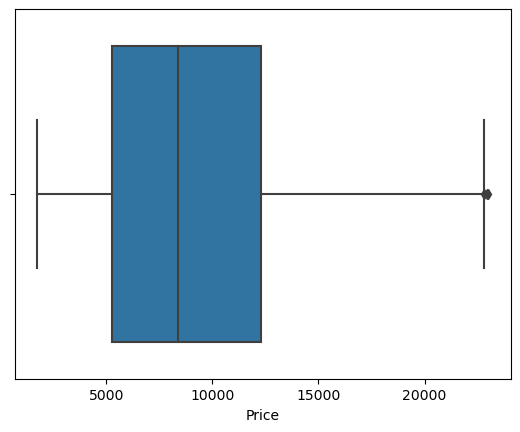

In [88]:
sns.boxplot(x=new_data.Price)

## Splitting of data into x and y

In [89]:
x = new_data.drop('Price',axis=1)
y = new_data['Price']

In [90]:
# Training the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=4)

In [91]:
x_train.shape

(7477, 29)

In [92]:
x_test.shape

(3205, 29)

## Model Building
### Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [94]:
y_pred = model.predict(x_test)
y_pred

array([11151.86291504, 13580.80749512,  9657.35144043, ...,
        6705.65209961,  9673.74987793,  4262.7142334 ])

## Evaluating the model

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [96]:
mse=mean_squared_error(y_test,y_pred)
mse

8.63569999102865e+21

In [97]:
mae=mean_absolute_error(y_test,y_pred)
mae

1641478662.2020125

In [98]:
rmse=np.sqrt(mse)
rmse

92928467064.88087

In [99]:
r2_score(y_test,y_pred)

-529990890723185.2

In [100]:
model.predict([[2,3,23,0,17,15,20,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0]])

array([4.5099415e+08])

## KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model2=KNeighborsRegressor(n_neighbors=5)
model2.fit(x_train,y_train)

In [ ]:
y_pred = model2.predict(x_test)

In [ ]:
y_pred

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
model2.predict([[2,3,23,0,17,15,20,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0]])

## SVM

In [ ]:
from sklearn.svm import SVR
model3 = SVR(kernel = 'linear',C=0.1)
model3.fit(x_train,y_train)

In [ ]:
y_pred = model3.predict(x_test)
y_pred

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
model3.predict([[2,3,23,0,17,15,20,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0]])

## Decision tree regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model4= DecisionTreeRegressor(random_state=20)
model4.fit(x_train,y_train)

In [ ]:
y_pred = model4.predict(x_test)

In [ ]:
y_pred

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
model4.predict([[2,3,23,0,17,15,20,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0]])

## Random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model5 = RandomForestRegressor(n_estimators = 180,random_state=30)
model5.fit(x_train,y_train)

In [ ]:
y_pred=model5.predict(x_test)
y_pred

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
model5.predict([[2,3,23,0,17,15,20,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0]])

## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model6=GradientBoostingRegressor(n_estimators=190, random_state=70)
model6.fit(x_train,y_train)

In [ ]:
y_pred = model6.predict(x_test)

In [ ]:
y_pred

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
model6.predict([[2,3,23,0,17,15,20,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0]])

## XG boost regressor

In [ ]:
import xgboost as xgb
model7 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=90, random_state=30)
model7.fit(x_train,y_train)

In [ ]:
y_pred = model7.predict(x_test)
y_pred

In [ ]:
# Evaluating the model
mse = mean_squared_error(y_test,y_pred)
mse

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
model7.predict([[2,3,23,0,17,15,20,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0]])